# Advanced Data Cleaning III


# It is time to look at sales data to help the company identify opportunities to launch a new video game.
Initially we will use the game sales data which we acquired from a public repository and later we will combine it with our previous analysis to answer the following questions:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from itertools import combinations
#import time
#from datetime import datetime
pd.set_option('display.max_columns', None)

In [81]:
df_original = pd.read_csv(r'igbd_dataset_v2.csv', low_memory=False)
df_original.head(7)
#df_original.info()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial,Platform,url
0,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3458498030,0.0,https://www.igdb.com/games/playerunknowns-batt...
1,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4837463162,0.0,https://www.igdb.com/games/playerunknowns-batt...
2,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4275517364,0.0,https://www.igdb.com/games/playerunknowns-batt...
3,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7612000280,0.0,https://www.igdb.com/games/grand-theft-auto-v
4,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7107100479,0.0,https://www.igdb.com/games/grand-theft-auto-v
5,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9493671628,0.0,https://www.igdb.com/games/grand-theft-auto-v
6,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8635296110,0.0,https://www.igdb.com/games/grand-theft-auto-v


In [3]:
df_game_sales = pd.read_csv(r'video_games_sales_2019.csv', low_memory=False)
df_game_sales.head(10)

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...
1,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.20,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...
2,6315.0,PlayerUnknown's Battlegrounds,Shooter,T,Sony Interactive Entertainment,PUBG Corporation,NaN,NaN,NaN,0.13,0.15,NaN,0.05,2018.0,18th Nov 18,1.0,NaN,/games/boxart/full_2004622AmericaFrontccc.jpg,4275517364,PS4,http://www.vgchartz.com/game/223059/playerunkn...
3,20.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.4,NaN,6.37,9.85,0.99,3.12,2013.0,NaN,1.0,NaN,/games/boxart/full_6510540AmericaFrontccc.jpg,7612000280,PS3,http://www.vgchartz.com/game/65884/grand-theft...
4,21.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.7,NaN,6.06,9.71,0.60,3.02,2014.0,03rd Jan 18,1.0,NaN,/games/boxart/full_5563178AmericaFrontccc.jpg,7107100479,PS4,http://www.vgchartz.com/game/83196/grand-theft...
5,33.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,NaN,NaN,9.06,5.33,0.06,1.42,2013.0,NaN,1.0,NaN,/games/boxart/full_9218923AmericaFrontccc.jpg,9493671628,X360,http://www.vgchartz.com/game/65883/grand-theft...
6,61.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,NaN,12.60,NaN,NaN,NaN,NaN,2015.0,02nd Nov 18,1.0,NaN,/games/boxart/full_9031276AmericaFrontccc.jpg,8635296110,PC,http://www.vgchartz.com/game/83197/grand-theft...
7,108.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.0,NaN,4.70,3.25,0.01,0.76,2014.0,11th Apr 18,1.0,NaN,/games/boxart/full_8047513AmericaFrontccc.jpg,9665394320,XOne,http://www.vgchartz.com/game/73074/grand-theft...
8,29.0,Pokemon X/Y,Role-Playing,E,Nintendo,Game Freak,NaN,8.9,16.37,NaN,NaN,NaN,NaN,2013.0,06th Jan 18,1.0,NaN,/games/boxart/full_9470074AmericaFrontccc.png,2574378926,3DS,http://www.vgchartz.com/game/71449/pokemon-xy/...
9,32.0,Pokemon Sun/Moon,Role-Playing,E,Nintendo,Game Freak,NaN,9.0,16.14,NaN,NaN,NaN,NaN,2016.0,03rd Aug 18,1.0,NaN,/games/boxart/full_6532288JapanFrontccc.png,7833542650,3DS,http://www.vgchartz.com/game/91783/pokemon-sun...


In [61]:
df_game_sales['Name'].sort_values()

5516                                           #IDARB
5517                                  #killallzombies
2293                          .hack//G.U. Last Recode
2294                          .hack//G.U. Last Recode
5241    0-ji no Kane to Cinderella: Halloween Wedding
                            ...                      
8405                           smackdown vs. raw 2009
1159                      theHunter: Call of the Wild
1161                      theHunter: Call of the Wild
1160                      theHunter: Call of the Wild
2480                                theHunter: Primal
Name: Name, Length: 10513, dtype: object

In [4]:
df_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10513 entries, 0 to 10512
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            10513 non-null  float64
 1   Name            10513 non-null  object 
 2   Genre           10513 non-null  object 
 3   ESRB_Rating     3330 non-null   object 
 4   Publisher       10513 non-null  object 
 5   Developer       10512 non-null  object 
 6   VGChartz_Score  0 non-null      float64
 7   Critic_Score    609 non-null    float64
 8   Total_Shipped   695 non-null    float64
 9   NA_Sales        2276 non-null   float64
 10  PAL_Sales       2131 non-null   float64
 11  JP_Sales        1977 non-null   float64
 12  Other_Sales     2789 non-null   float64
 13  Year            10513 non-null  float64
 14  Last_Update     6133 non-null   object 
 15  status          10513 non-null  float64
 16  Vgchartzscore   141 non-null    float64
 17  img_url         10513 non-null 

In [5]:
print(df_game_sales.Total_Shipped.unique().tolist())

[36.6, nan, 12.6, 16.37, 16.14, 15.02, 14.17, 13.76, 13.0, 12.1, 12.08, 11.68, 1.61, 10.0, 9.45, 9.15, 9.0, 8.7, 8.42, 8.28, 8.27, 7.03, 6.4, 5.98, 5.82, 5.8, 5.75, 5.5, 5.48, 5.35, 5.3, 5.22, 5.0, 4.94, 4.91, 4.56, 4.5, 1.5, 1.0, 4.31, 4.3, 4.2, 4.18, 1.4, 4.1, 1.03, 4.0, 2.93, 3.83, 1.04, 0.67, 3.71, 3.7, 3.61, 3.58, 3.47, 3.4, 0.54, 3.32, 3.3, 3.29, 2.09, 1.01, 3.04, 1.75, 3.0, 0.86, 2.87, 2.86, 2.85, 2.76, 2.71, 2.68, 2.6, 2.58, 2.53, 2.5, 2.49, 2.42, 1.85, 2.37, 0.99, 2.31, 2.3, 2.28, 2.24, 2.21, 2.2, 2.19, 2.15, 2.1, 2.08, 1.98, 2.01, 0.82, 2.0, 1.97, 1.94, 1.91, 1.9, 1.88, 1.86, 0.74, 1.83, 1.82, 1.8, 1.78, 1.76, 1.74, 1.71, 1.7, 1.68, 1.6, 1.55, 1.53, 1.51, 0.69, 1.18, 1.49, 1.48, 0.98, 0.44, 0.32, 1.41, 1.39, 1.37, 0.55, 1.35, 1.05, 1.33, 1.32, 0.34, 1.31, 0.25, 1.3, 0.57, 1.27, 0.14, 1.28, 1.25, 1.24, 1.23, 1.22, 0.89, 0.35, 1.2, 1.19, 1.16, 1.14, 0.75, 1.13, 1.11, 1.1, 0.23, 1.09, 1.06, 0.7, 0.21, 0.11, 0.97, 0.96, 0.33, 0.94, 0.93, 0.91, 0.9, 0.87, 0.15, 0.84, 0.83, 0.81, 0

In [6]:
print(df_game_sales.Platform.unique().tolist())

['PC', 'XOne', 'PS4', 'PS3', 'X360', '3DS', 'NS', 'PSV', 'WiiU', 'OSX', 'Linux', 'Wii', 'PSP', 'And', 'PS2', 'Ouya', 'XBL', 'Arc', 'WinP', 'DS', 'PSN', 'iOS', 'Amig', 'PS', 'BRW', '2600', 'PCFX', 'Mob', 'GBA', 'DSiW', 'GB', 'Lynx', 'DSi', 'GIZ', 'DC', 'WW', 'iQue', 'MSD', 'MS', 'ZXS', 'Int', 'NES']


# 1.How do video game sales (Total_Shipped) change over time?


In [7]:
df1 = df_game_sales.copy()
df2 = df1[['Total_Shipped','Year']].groupby(by='Year')['Total_Shipped'].sum().reset_index()

df2.head(20)

,Year,Total_Shipped
0,2013.0,177.95
1,2014.0,139.74
2,2015.0,120.30
3,2016.0,123.50
4,2017.0,157.22
5,2018.0,80.52


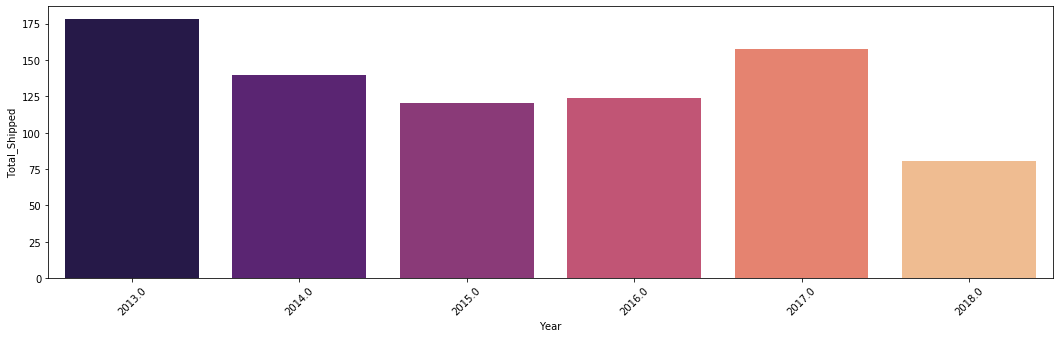

In [8]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Year', y = 'Total_Shipped',palette = "magma", data=df2)
plt.setp(ax.get_xticklabels(), rotation=45)
None

# 2.Which are the top 5 video game platforms in terms of sales (Total_Shipped)? Are the three platforms we study among them?


In [9]:
df3 = df1[['Platform','Total_Shipped']].groupby(by='Platform')['Total_Shipped'].sum().reset_index().sort_values(by=['Total_Shipped'], ascending=False)
df3.head(5)

,Platform,Total_Shipped
23,PC,378.16
1,3DS,168.30
20,NS,97.48
28,PS4,59.91
34,WiiU,51.05


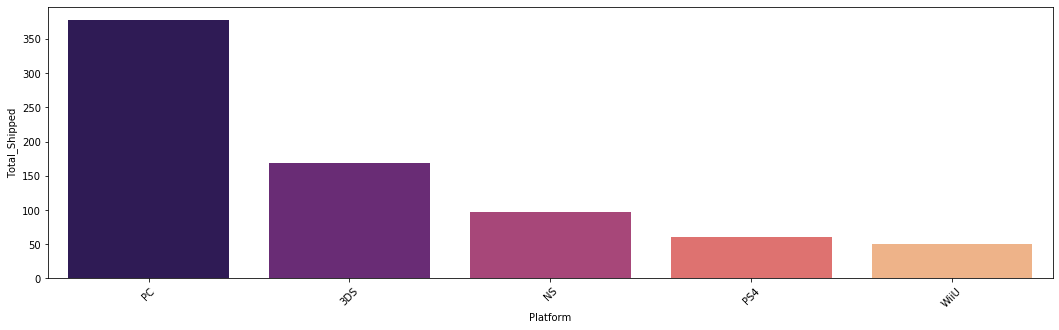

In [10]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Platform', y = 'Total_Shipped',palette = "magma", data=df3.head(5))
plt.setp(ax.get_xticklabels(), rotation=45)
None

# 3.Which are the top 10 selling games for each of the platforms of interest?


In [11]:
df_platform_interest = df1[(df1['Platform']=='PC') | (df1['Platform']=='3DS') | (df1['Platform']=='NS') | (df1['Platform']=='PS4') | (df1['Platform']=='WiiU') ]

df4 = df_platform_interest[['Platform','Name','Total_Shipped']].groupby(by=['Platform','Name'])['Total_Shipped'].sum()#.reset_index().sort_values(by=['Total_Shipped'], ascending=False)

In [28]:
platforms_of_interest = ['PC','3DS','NS','PS4','WiiU']
def top_10_games(x):
    df_platform_interest = df1[df1['Platform']==x]
    y = df_platform_interest[['Platform','Name','Total_Shipped']].groupby(by=['Platform','Name'])['Total_Shipped'].sum().reset_index().sort_values(by=['Total_Shipped'], ascending=False).head(10)
    return y

df5 = pd.DataFrame()
for i in platforms_of_interest:
    df5 = pd.concat([df5, top_10_games(i)])
    #df5.concat(top_10_games(i))
    #print(top_10_games(i))
    
#df5 contains the solution to the given question
#df5.head(30)

In [29]:
#TESTING

#df_platform_interest = df1[df1['Platform']=='PC']
#a = df_platform_interest[['Platform','Name','Total_Shipped']].groupby(by=['Platform','Name'])['Total_Shipped'].sum().reset_index().sort_values(by=['Total_Shipped'], ascending=False).head(10)

#df_platform_interest = df1[df1['Platform']=='PS4']
#b = df_platform_interest[['Platform','Name','Total_Shipped']].groupby(by=['Platform','Name'])['Total_Shipped'].sum().reset_index().sort_values(by=['Total_Shipped'], ascending=False).head(10)

#pd.concat([a,b])

# 4.Are critic scores and user scores (ratings) different for these platforms?


In [48]:
df_platform_interest = df1[(df1['Platform']=='PC') | (df1['Platform']=='3DS') | (df1['Platform']=='NS') | (df1['Platform']=='PS4') | (df1['Platform']=='WiiU') ]
result = pd.merge(df_original[['serial','rating']],df_platform_interest[['serial','Critic_Score','Platform']], on = 'serial')
#df_platform_interest.head()

In [49]:

result.drop('serial', inplace=True, axis=1)
result.info()
#result.groupby(by= 'Platform')['rating','Critic_Score'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        2801 non-null   float64
 1   Critic_Score  350 non-null    float64
 2   Platform      3340 non-null   object 
dtypes: float64(2), object(1)
memory usage: 104.4+ KB


In [52]:
result.dropna(thresh=2,inplace=True)

In [53]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 3339
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        2801 non-null   float64
 1   Critic_Score  350 non-null    float64
 2   Platform      2808 non-null   object 
dtypes: float64(2), object(1)
memory usage: 87.8+ KB


In [57]:
result['normalized_rating'] = (result['rating'] - result['rating'].min())/(result['rating'].max() - result['rating'].min()) * 100
result['normalized_Critic_Score'] = (result['Critic_Score'] - result['Critic_Score'].min())/(result['Critic_Score'].max() - result['Critic_Score'].min()) * 100
result.head()

,rating,Critic_Score,Platform,normalized_rating,normalized_Critic_Score
0,75.577492,NaN,PC,72.810233,NaN
1,75.577492,NaN,PS4,72.810233,NaN
2,91.007003,9.7,PS4,89.988027,96.25
3,91.007003,NaN,PC,89.988027,NaN
4,84.879498,9.3,NS,83.166228,91.25


In [58]:
result.groupby(by= 'Platform')['normalized_rating','normalized_Critic_Score'].mean()

/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,normalized_rating,normalized_Critic_Score
Platform,,
3DS,68.827906,65.686620
NS,68.270492,70.325521
PC,65.785942,74.475000
PS4,68.287541,75.416667
WiiU,66.327160,68.451087


# 5.Bonus: Which genres have the highest sales for all these platforms?


In [77]:
#df_platform_interest = df1[(df1['Platform']=='PC') | (df1['Platform']=='3DS') | (df1['Platform']=='NS') | (df1['Platform']=='PS4') | (df1['Platform']=='WiiU') | (df1['Platform']=='XOne') ]
df_platform_interest = df1[(df1['Platform']=='PC') | (df1['Platform']=='PS4') | (df1['Platform']=='XOne') ]
df10 = df_platform_interest[['Genre','Total_Shipped']].groupby(by='Genre')['Total_Shipped'].sum().reset_index().sort_values(by=['Total_Shipped'],ascending=False)


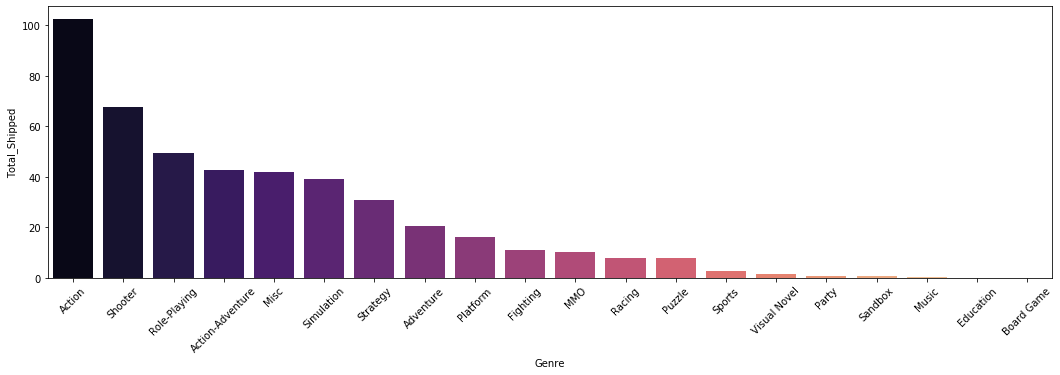

In [84]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Genre', y = 'Total_Shipped',palette = "magma", data=df10)
plt.setp(ax.get_xticklabels(), rotation=45)
None

In [86]:
#df_platform_interest.head()

In [85]:
#df_platform_interest.info()

# 6.Super bonus: Which pair of genres is the most popular?


In [139]:
df30 = pd.merge(df_original,df_platform_interest, on = 'serial')
df30.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial,Platform_x,url_x,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,Platform_y,url_y
0,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3458498030,0.0,https://www.igdb.com/games/playerunknowns-batt...,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,PC,http://www.vgchartz.com/game/215988/playerunkn...
1,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4837463162,0.0,https://www.igdb.com/games/playerunknowns-batt...,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.20,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,XOne,http://www.vgchartz.com/game/215989/playerunkn...
2,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4275517364,0.0,https://www.igdb.com/games/playerunknowns-batt...,6315.0,PlayerUnknown's Battlegrounds,Shooter,T,Sony Interactive Entertainment,PUBG Corporation,NaN,NaN,NaN,0.13,0.15,NaN,0.05,2018.0,18th Nov 18,1.0,NaN,/games/boxart/full_2004622AmericaFrontccc.jpg,PS4,http://www.vgchartz.com/game/223059/playerunkn...
3,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7107100479,0.0,https://www.igdb.com/games/grand-theft-auto-v,21.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.7,NaN,6.06,9.71,0.6,3.02,2014.0,03rd Jan 18,1.0,NaN,/games/boxart/full_5563178AmericaFrontccc.jpg,PS4,http://www.vgchartz.com/game/83196/grand-theft...
4,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [141]:
from itertools import chain

In [91]:
#df1.info()
df1.head()

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...
1,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.20,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...
2,6315.0,PlayerUnknown's Battlegrounds,Shooter,T,Sony Interactive Entertainment,PUBG Corporation,NaN,NaN,NaN,0.13,0.15,NaN,0.05,2018.0,18th Nov 18,1.0,NaN,/games/boxart/full_2004622AmericaFrontccc.jpg,4275517364,PS4,http://www.vgchartz.com/game/223059/playerunkn...
3,20.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.4,NaN,6.37,9.85,0.99,3.12,2013.0,NaN,1.0,NaN,/games/boxart/full_6510540AmericaFrontccc.jpg,7612000280,PS3,http://www.vgchartz.com/game/65884/grand-theft...
4,21.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.7,NaN,6.06,9.71,0.60,3.02,2014.0,03rd Jan 18,1.0,NaN,/games/boxart/full_5563178AmericaFrontccc.jpg,7107100479,PS4,http://www.vgchartz.com/game/83196/grand-theft...


In [92]:
genre_list = df1['Genre'].tolist()

In [94]:
len(genre_list)

10513

In [136]:
genre_list_unique = set(genre_list)
#genre_list_unique
pairs = list(combinations(genre_list_unique,2))
#pairs
pair_dict= {}
for i in pairs:
    pair_dict.update({i:0})
pair_dict

{('Strategy', 'Shooter'): 0,
 ('Strategy', 'Platform'): 0,
 ('Strategy', 'Misc'): 0,
 ('Strategy', 'MMO'): 0,
 ('Strategy', 'Racing'): 0,
 ('Strategy', 'Education'): 0,
 ('Strategy', 'Action-Adventure'): 0,
 ('Strategy', 'Role-Playing'): 0,
 ('Strategy', 'Fighting'): 0,
 ('Strategy', 'Sports'): 0,
 ('Strategy', 'Sandbox'): 0,
 ('Strategy', 'Puzzle'): 0,
 ('Strategy', 'Party'): 0,
 ('Strategy', 'Board Game'): 0,
 ('Strategy', 'Action'): 0,
 ('Strategy', 'Visual Novel'): 0,
 ('Strategy', 'Music'): 0,
 ('Strategy', 'Simulation'): 0,
 ('Strategy', 'Adventure'): 0,
 ('Shooter', 'Platform'): 0,
 ('Shooter', 'Misc'): 0,
 ('Shooter', 'MMO'): 0,
 ('Shooter', 'Racing'): 0,
 ('Shooter', 'Education'): 0,
 ('Shooter', 'Action-Adventure'): 0,
 ('Shooter', 'Role-Playing'): 0,
 ('Shooter', 'Fighting'): 0,
 ('Shooter', 'Sports'): 0,
 ('Shooter', 'Sandbox'): 0,
 ('Shooter', 'Puzzle'): 0,
 ('Shooter', 'Party'): 0,
 ('Shooter', 'Board Game'): 0,
 ('Shooter', 'Action'): 0,
 ('Shooter', 'Visual Novel'): 0,


In [131]:
#pairs

In [116]:
count_dict = Counter(genre_list)

In [119]:
count_dict

Counter({'Shooter': 546,
         'Action': 1833,
         'Role-Playing': 889,
         'Racing': 320,
         'Action-Adventure': 376,
         'Platform': 470,
         'Misc': 2698,
         'Sandbox': 4,
         'Simulation': 403,
         'Fighting': 313,
         'Sports': 491,
         'Strategy': 411,
         'Adventure': 918,
         'Party': 43,
         'Music': 158,
         'MMO': 49,
         'Puzzle': 431,
         'Visual Novel': 147,
         'Board Game': 11,
         'Education': 2})

In [125]:
pair_dict = {}
for i in pairs:
    for key in pair_dict.keys():
        for key2 in count_dict.keys():
            if key in i:
                pair_dict[key] +=

SyntaxError: unexpected EOF while parsing (2612190382.py, line 4)

# 7.Bonus - take home exercise: in the case that there were no serial numbers to use for merging the two dataframes, what would you do to make the best possible merge?

# What is your final recommendation to the client?

Save your final dataset to pickle!

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in memory in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.